# Statistics Reference Part 1

## Table of Contents:
* [Types of Skew](#skew)
* [Variance](#Variance)
* [Standard Deviation](#Standard Deviation)
* [Coefficient of Variation](#Coefficient of Variation)

| <h3>Population (N):</h3> | <h3>Sample (n):</h3>
| :--------------------------------- | :-
| Collection of all items of interest in the study | A subset of the poulation
| Paramaters | Statistics

## Types of Skew <a class="anchor" id="skew"></a>

Text(0.5,1,'Left Skewed')

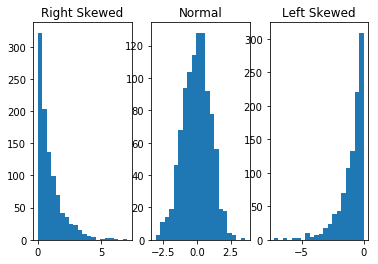

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

right_skewed = np.random.exponential(size = 1000)
normal_skewed = np.random.normal(size=1000)
left_skewed = -np.random.exponential(size=1000)


# plot both together to compare
fig, ax=plt.subplots(1,3)
ax[0].hist(right_skewed, bins=20)
ax[0].set_title("Right Skewed")
ax[1].hist(normal_skewed, bins=20)
ax[1].set_title("Normal")
ax[2].hist(left_skewed, bins=20)
ax[2].set_title("Left Skewed")

## Variance <a class="anchor" id="Variance"></a>

 - measures the dispersion of a set of data points around their mean.



\begin{align}
\textbf{Population Variance} && \textbf{Sample Variance} \\
               \sigma^2 = \frac{\sum_{i=1}^N (x_i-\mu)^2}{N} &&
               S^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1}
\end{align}


In [52]:
def getVariance(data):
    """ Input: np.array
        Returns: Sample Variance"""
    
    mean = data.mean()
    numerator = 0
    
    for num in data:
        numerator += (num - mean)**2
    
    variance = numerator/data.size - 1
    
    return variance

In [53]:
print("right_skewed Variance:",getVariance(right_skewed))

right_skewed Variance: 0.0497442803543


### Standard Deviation <a class="anchor" id="Standard Deviation"></a>

### Coefficient of Variation  <a class="anchor" id="Coefficient of Variation"></a>